In [100]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [101]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [102]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [103]:
def compute_loss(y, tx, w):
    """Calculate the loss.
        USING MSE
    """
    k = 1 / (2 * y.shape[0]) 
    e = y - tx.dot(w)
    return k * np.transpose(e).dot(e)

#compute_loss(y, tx, np.transpose([1,2]))

# 2 Grid Search

Fill in the function `grid_search()` below:

In [104]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, np.transpose([w0[i], w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.143 seconds


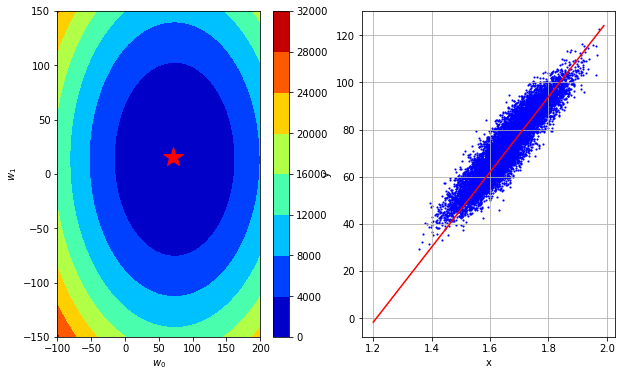

In [105]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
# fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [106]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    k = -1 / y.shape[0]
    e = y - tx.dot(w)
    return k * np.transpose(tx).dot(e)
    
print(compute_gradient(y[:2], tx[:2], np.transpose([1,2])))
print(compute_gradient(y, tx, np.transpose([100, 20])))
print(compute_gradient(y, tx, np.transpose([50, 10])))
print(compute_gradient(y, tx, np.transpose([0, 0])))

[ -88.18271793 -124.41038771]
[ 26.706078     6.52028757]
[-23.293922    -3.47971243]
[-73.293922   -13.47971243]


Please fill in the functions `gradient_descent` below:

In [107]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, gradient={g}".format(
        #    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1], g=compute_gradient(y, tx, w)))
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [108]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([50,10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
print(gradient_ws[-1:])

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[array([ 73.17387036,  13.46177878])]
Gradient Descent: execution time=0.008 seconds


In [109]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [110]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, gradient={g}".format(
        #    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1], g=compute_gradient(y, tx, w)))
    return losses, ws

In [111]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.027 seconds


In [112]:
# Time Visualization
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [113]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [114]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([50,10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
print(gradient_ws[-1:])

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[array([ 73.51047704,  14.4526381 ])]
Gradient Descent: execution time=0.002 seconds


In [115]:
# Time Visualization
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [116]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [117]:
# MAE Version
def compute_loss(y, tx, w):
    """Calculate the loss.
        USING MAE
    """
    k = 1 / y.shape[0]
    e = np.absolute(y - tx.dot(w))
    return k * np.transpose(e).dot(np.ones(y.shape[0]))

# compute_loss(y, tx, np.transpose([1,2]))

In [118]:
def compute_gradient(y, tx, w):
    e = y - tx.dot(w)
    gradients = np.array((0.0, 0.0))
    r = np.random.uniform(-1,1)
    
    for i in range(e.shape[0]):
        if e[i] == 0:
            gradients += r * tx[i]
        elif e[i] > 0:
            gradients -= tx[i]
        else:
            gradients += tx[i]
            
    return gradients / y.shape[0]

#print(compute_gradient(y[:10], tx[:10], np.transpose([100, 500])))
#print(compute_gradient(y, tx, np.transpose([50, 10])))
#print(compute_gradient(y, tx, np.transpose([0, 0])))
#print(compute_gradient(y, tx, np.transpose([500, 500])))

In [121]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.5

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mae(y, tx, w_initial, max_iters, gamma)
print(np.array(gradient_ws))
end_time = datetime.datetime.now()
print(gradient_ws[-1:])

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[[  0.00000000e+00   0.00000000e+00]
 [  5.00000000e-01  -1.10926823e-15]
 [  1.00000000e+00  -2.21853647e-15]
 [  1.50000000e+00  -3.32780470e-15]
 [  2.00000000e+00  -4.43707293e-15]
 [  2.50000000e+00  -5.54634116e-15]
 [  3.00000000e+00  -6.65560940e-15]
 [  3.50000000e+00  -7.76487763e-15]
 [  4.00000000e+00  -8.87414586e-15]
 [  4.50000000e+00  -9.98341410e-15]
 [  5.00000000e+00  -1.10926823e-14]
 [  5.50000000e+00  -1.22019506e-14]
 [  6.00000000e+00  -1.33112188e-14]
 [  6.50000000e+00  -1.44204870e-14]
 [  7.00000000e+00  -1.55297553e-14]
 [  7.50000000e+00  -1.66390235e-14]
 [  8.00000000e+00  -1.77482917e-14]
 [  8.50000000e+00  -1.88575600e-14]
 [  9.00000000e+00  -1.99668282e-14]
 [  9.50000000e+00  -2.10760964e-14]
 [  1.00000000e+01  -2.21853647e-14]
 [  1.05000000e+01  -2.32946329e-14]
 [  1.10000000e+01  -2.44039011e-14]
 [  1.15000000e+01  -2.55131694e-14]
 [  1.20000000e+01  -2.66224376e-14]
 [  1.25000000e+01  -2.77317058e-14]
 [  1.30000000e+01  -2.88409741e-14]
 

In [122]:
# Time Visualization
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>